In [528]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

data = pd.read_csv('cloud-data/bus_data_modified.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load,stop
0,4855,4131,Transit Bus,212.735226,LX Route,02:23 PM,-74.433571,40.519749,0,67,101,402213,111417,2024-10-31 18:24:00,0.000000,Quads
1,4859,4177,Transit Bus,128.232575,LX Route,02:23 PM,-74.436304,40.524327,27,67,102,402325,111417,2024-10-31 18:24:00,0.402985,Livingston Student Center
2,4873,4191,Transit Bus,240.802514,B Route,02:23 PM,-74.457712,40.523463,8,67,101,402329,113278,2024-10-31 18:24:00,0.119403,NaN
3,4876,4194,Transit Bus,299.246496,B Route,02:23 PM,-74.438946,40.521624,4,67,102,402330,113250,2024-10-31 18:24:00,0.059701,NaN
4,17624,4002,Heavy Duty Transit LF,226.694476,REXB Route,02:23 PM,-74.438830,40.483538,2,68,102,402643,112511,2024-10-31 18:24:00,0.029412,NaN


In [529]:
from random import choice

one_bus = int(choice(data['name'].unique()))
one_bus_data = data[data['name'] == one_bus]
one_bus_data.head()

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load,stop
46,18021,4134,Heavy Duty Low Floor Transit,52.907163,B Route,02:23 PM,-74.455195,40.525037,38,53,101,441424,113245,2024-10-31 18:24:00,0.716981,NaN
94,18021,4134,Heavy Duty Low Floor Transit,107.236160,B Route,02:24 PM,-74.448141,40.524890,38,53,102,441424,113245,2024-10-31 18:24:31,0.716981,NaN
142,18021,4134,Heavy Duty Low Floor Transit,105.490139,B Route,02:24 PM,-74.443264,40.523561,38,53,102,441424,113245,2024-10-31 18:25:01,0.716981,NaN
189,18021,4134,Heavy Duty Low Floor Transit,120.873424,B Route,02:25 PM,-74.440761,40.522877,38,53,102,441424,113245,2024-10-31 18:25:32,0.716981,NaN
236,18021,4134,Heavy Duty Low Floor Transit,45.051327,B Route,02:26 PM,-74.438885,40.524807,38,53,102,441424,113245,2024-10-31 18:26:02,0.716981,Livingston Plaza


In [530]:
one_bus_data['routeName'].unique()

array(['B Route', 'REXB Route', 'Weekend 1', 'Weekend 2', 'EE Route',
       'F Route'], dtype=object)

In [531]:
one_bus_data.describe()

,id,name,calculatedCourse,longitude,latitude,paxLoad,totalCap,more,deviceId,routeBlockId,timestamp,load
count,9425.0,9425.0,9425.000000,9425.000000,9425.000000,9425.000000,9425.0,9425.000000,9425.0,9425.000000,9425,9425.000000
mean,18021.0,4134.0,184.923544,-74.446067,40.500936,40.134218,53.0,101.566897,441424.0,108117.487533,2024-11-04 08:29:06.147055616,0.757249
min,18021.0,4134.0,0.218613,-74.465858,40.478893,0.000000,53.0,101.000000,441424.0,70455.000000,2024-10-31 18:24:00,0.000000
25%,18021.0,4134.0,107.354995,-74.453292,40.485456,29.000000,53.0,101.000000,441424.0,111574.000000,2024-11-01 23:01:43,0.547170
50%,18021.0,4134.0,175.601294,-74.441654,40.499509,52.000000,53.0,102.000000,441424.0,112515.000000,2024-11-04 18:43:37,0.981132
75%,18021.0,4134.0,278.977209,-74.437604,40.519427,53.000000,53.0,102.000000,441424.0,113251.000000,2024-11-06 14:59:04,1.000000
max,18021.0,4134.0,359.899787,-74.428663,40.526531,53.000000,53.0,103.000000,441424.0,117898.000000,2024-11-07 21:51:49,1.000000
std,0.0,0.0,97.080561,0.010266,0.016069,17.980421,0.0,0.495745,0.0,14159.991834,NaN,0.339253


C:\Users\akash\AppData\Local\Temp\ipykernel_5392\1869793204.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
C:\Users\akash\AppData\Local\Temp\ipykernel_5392\1869793204.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
C:\Users\akash\AppData\Local\Temp\ipykernel_5392\1869793204.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

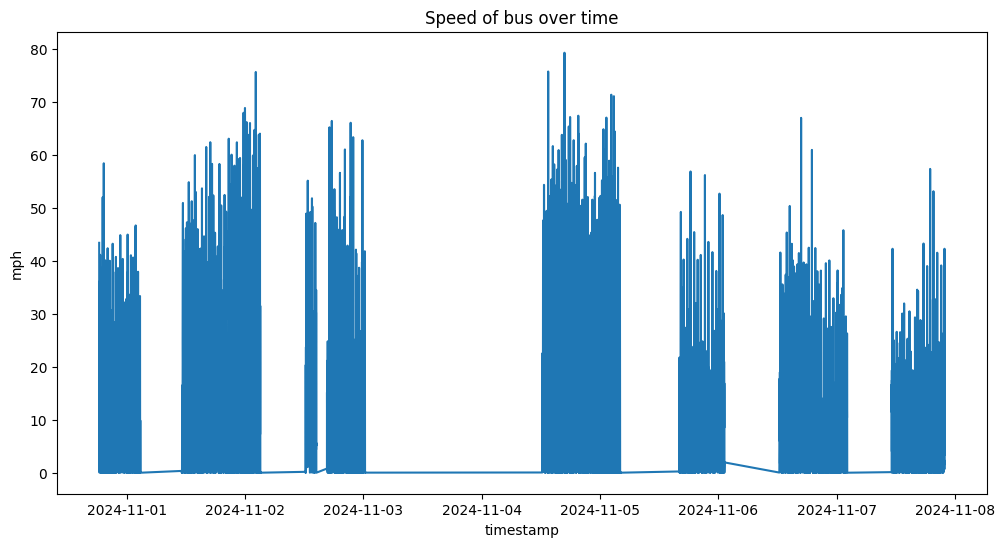

In [532]:
# convert the difference in longitude and latitude to miles per hour
# use difference in timestamp to calculate time
one_bus_data['time_diff'] = one_bus_data['timestamp'].diff().dt.total_seconds()
one_bus_data['lat_diff'] = one_bus_data['latitude'].diff()
one_bus_data['long_diff'] = one_bus_data['longitude'].diff()
one_bus_data['lat_miles'] = one_bus_data['lat_diff'] * 69
one_bus_data['long_miles'] = one_bus_data['long_diff'] * 53
one_bus_data['total_miles'] = (one_bus_data['lat_miles'] ** 2 + one_bus_data['long_miles'] ** 2) ** 0.5
one_bus_data['mph'] = one_bus_data['total_miles'] / one_bus_data['time_diff'] * 3600

# plot the speed of the bus over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='mph', data=one_bus_data)


plt.title('Speed of bus over time')
plt.show()

In [533]:
# calculate the change in load over time
one_bus_data['load_diff'] = one_bus_data['load'].diff()

C:\Users\akash\AppData\Local\Temp\ipykernel_5392\1176286829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['load_diff'] = one_bus_data['load'].diff()


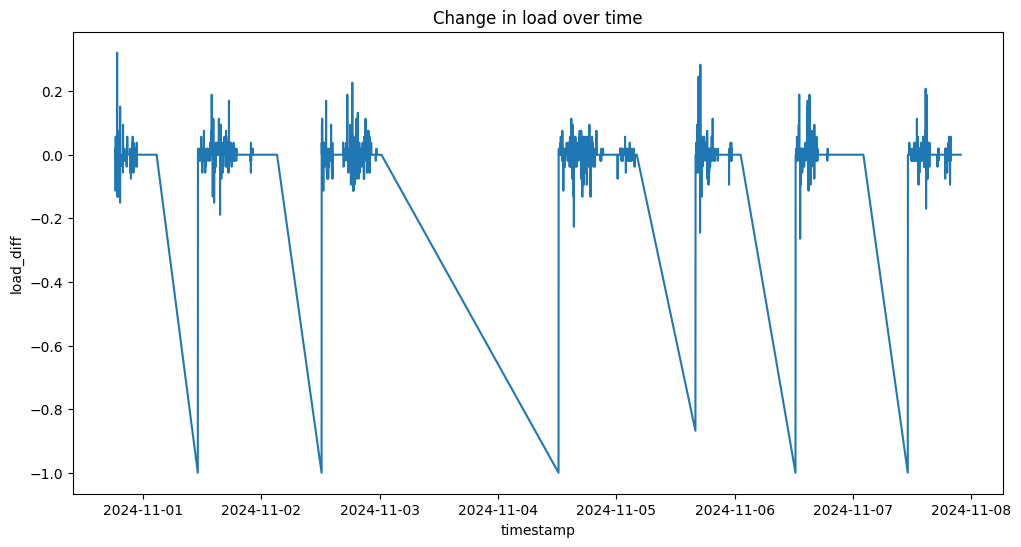

In [534]:
# plot the change in load over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='load_diff', data=one_bus_data)
plt.title('Change in load over time')
plt.show()

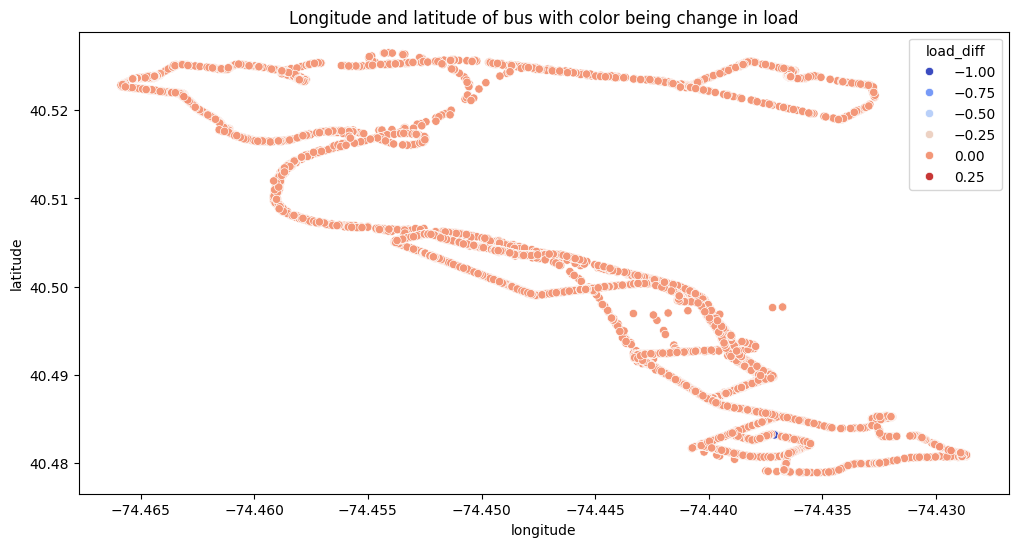

In [535]:
# plot longitude and latitude of bus with color being change in load
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='load_diff', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being change in load')
plt.show()

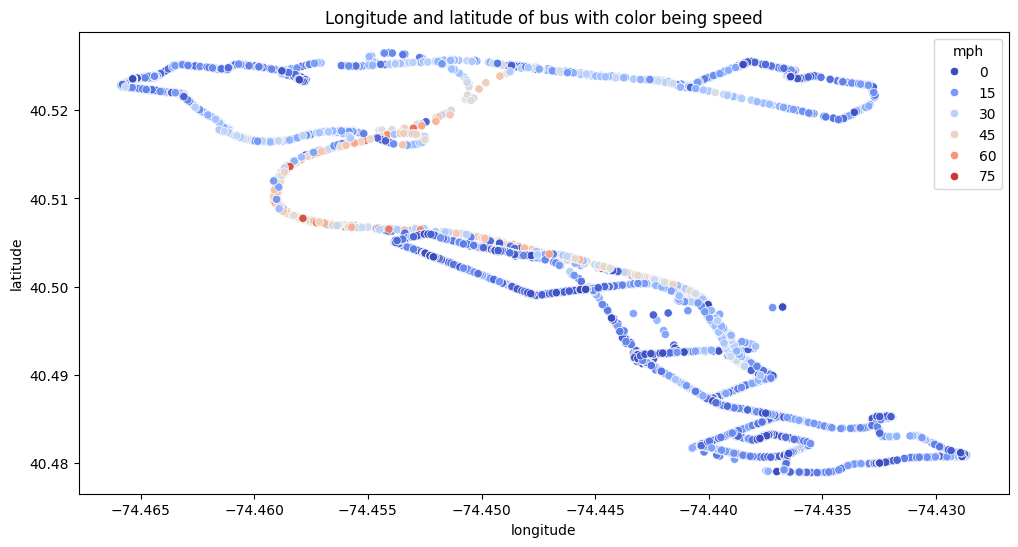

In [536]:
# graph all the places with 0 mph in color and everywhere else in black
plt.figure(figsize=(12, 6))
sns.scatterplot(x='longitude', y='latitude', hue='mph', data=one_bus_data, palette='coolwarm')
plt.title('Longitude and latitude of bus with color being speed')
plt.show()

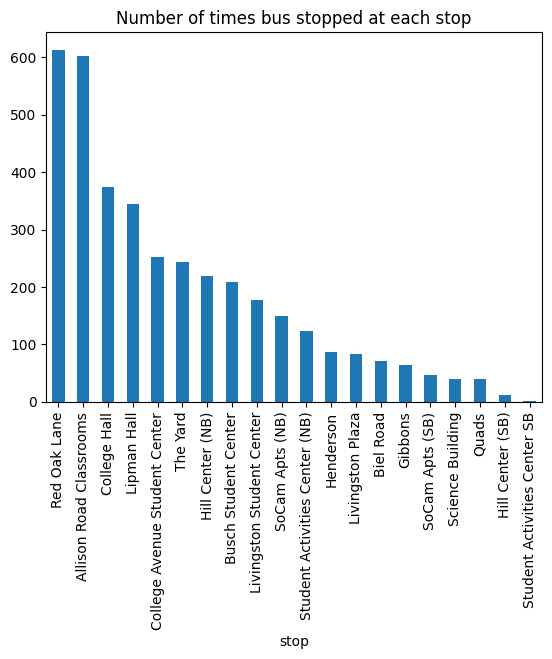

In [537]:
# make a bar graph of the stops
one_bus_data['stop'].value_counts().plot(kind='bar')
plt.title('Number of times bus stopped at each stop')
plt.show()

C:\Users\akash\AppData\Local\Temp\ipykernel_5392\1207899318.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1
C:\Users\akash\AppData\Local\Temp\ipykernel_5392\1207899318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5


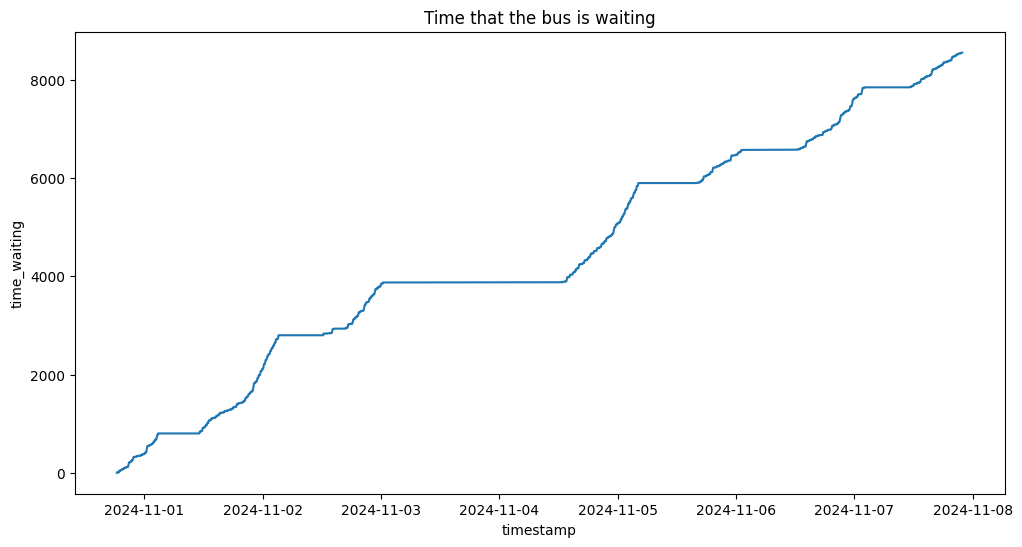

In [538]:
# get the time periods when the bus is not moving
one_bus_data['not_moving'] = one_bus_data['mph'] < 0.1

# calculate the time that the bus is waiting
one_bus_data['time_waiting'] = one_bus_data['not_moving'].cumsum() * 5

# plot the time that the bus is waiting
plt.figure(figsize=(12, 6))
sns.lineplot(x='timestamp', y='time_waiting', data=one_bus_data)
plt.title('Time that the bus is waiting')
plt.show()

In [539]:
# limit the data to when it is running one specific route
route = one_bus_data['routeName'].unique()[0]
one_bus_data = one_bus_data[one_bus_data['routeName'] == route]

C:\Users\akash\AppData\Local\Temp\ipykernel_5392\3518540220.py:29: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(limited['time_diff_stop'].dropna())


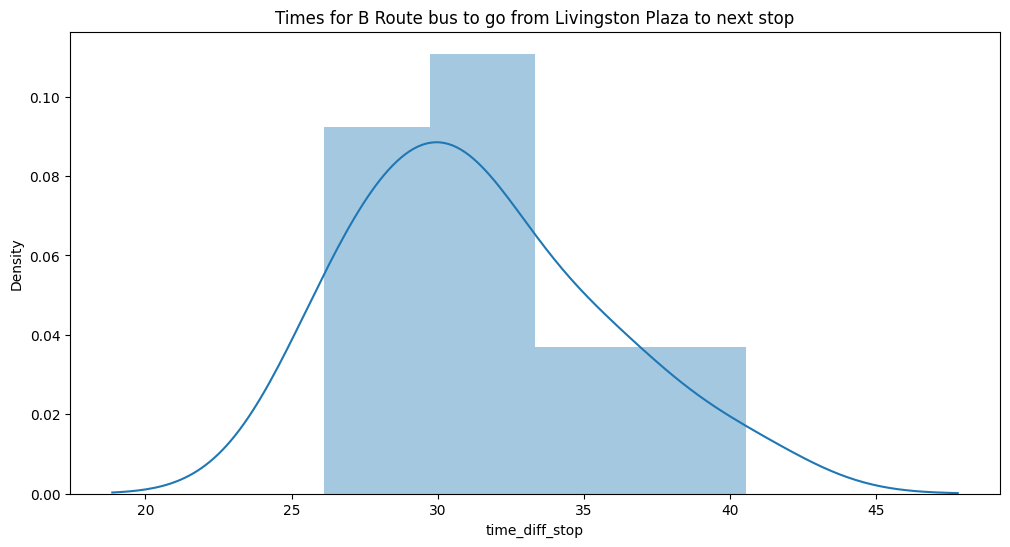

In [540]:
# measure the amount of time it takes for the bus to go from one stop to the next
stop = one_bus_data['stop'].unique()[0]

if type(stop) == float:
    stop = one_bus_data['stop'].unique()[1]

# make limited data which is each row of data where the bus is at the stop and went to another stop previously
# remove na stop rows
limited_total = one_bus_data.dropna(subset=['stop'])

# create new limited dataframe to add data to
limited = pd.DataFrame(columns=limited_total.columns)

en_route = False
for i in range(1, len(limited_total)):
    if limited_total.iloc[i]['stop'] == stop and en_route == True:
        limited = pd.concat([limited, limited_total.iloc[i].to_frame().T])
        en_route = False
    elif limited_total.iloc[i]['stop'] != stop:
        en_route = True


limited['time_diff_stop'] = limited['timestamp'].diff().dt.total_seconds() / 60

limited = limited[limited['time_diff_stop'] < 300]

# plot the distribution of the time it takes for the bus to go from one stop to the next
plt.figure(figsize=(12, 6))
sns.distplot(limited['time_diff_stop'].dropna())
plt.title(f'Times for {route} bus to go from {stop} to next stop')
plt.show()

In [541]:
limited

,id,name,type,calculatedCourse,routeName,created,longitude,latitude,paxLoad,totalCap,...,lat_diff,long_diff,lat_miles,long_miles,total_miles,mph,load_diff,not_moving,time_waiting,time_diff_stop
5609,18021,4134,Heavy Duty Low Floor Transit,45.463627,B Route,03:22 PM,-74.438548,40.52514,45,53,...,0.0006,0.000649,0.041393,0.034392,0.053816,6.457938,-0.150943,False,60,31.083333
8612,18021,4134,Heavy Duty Low Floor Transit,49.014942,B Route,03:53 PM,-74.43863,40.525016,53,53,...,0.001299,0.001325,0.089638,0.07023,0.113874,13.224057,0.0,False,90,31.116667
11337,18021,4134,Heavy Duty Low Floor Transit,44.19378,B Route,04:22 PM,-74.438549,40.525116,53,53,...,0.000601,0.000653,0.041497,0.034604,0.054031,6.274605,0.0,False,110,28.583333
14687,18021,4134,Heavy Duty Low Floor Transit,47.947426,B Route,04:56 PM,-74.438694,40.524988,53,53,...,0.000918,0.000958,0.063349,0.050758,0.081176,9.426837,0.0,False,210,34.733333
17627,18021,4134,Heavy Duty Low Floor Transit,26.250242,B Route,05:26 PM,-74.438695,40.524986,53,53,...,0.000408,0.000456,0.02818,0.024163,0.03712,4.454451,0.0,False,250,30.166667
21123,18021,4134,Heavy Duty Low Floor Transit,46.310628,B Route,06:02 PM,-74.438534,40.525114,49,53,...,0.000854,0.00089,0.058905,0.047186,0.075474,9.056895,-0.037736,False,325,35.816667
23655,18021,4134,Heavy Duty Low Floor Transit,48.098581,B Route,06:28 PM,-74.438813,40.52485,48,53,...,0.001399,0.0014,0.096517,0.074216,0.121752,14.61025,0.0,False,335,26.116667
26350,18021,4134,Heavy Duty Low Floor Transit,51.24494,B Route,06:57 PM,-74.438676,40.52497,53,53,...,0.001103,0.001147,0.076086,0.060765,0.097373,11.684728,0.0,False,345,28.183333
29262,18021,4134,Heavy Duty Low Floor Transit,44.745141,B Route,07:28 PM,-74.438793,40.524925,53,53,...,0.000724,0.000728,0.049956,0.038579,0.063118,7.329865,0.0,False,365,31.283333
31800,18021,4134,Heavy Duty Low Floor Transit,44.584103,B Route,07:58 PM,-74.438814,40.524888,53,53,...,0.000731,0.000771,0.050411,0.040879,0.064903,7.537117,0.0,False,385,30.266667
